<a href="https://colab.research.google.com/github/daeunknown/deeplearning-2022-summer/blob/main/8_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# sin 함수 영역 분류

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

X = np.arange(-1.0, 1.1, 0.1)
Y = np.arange(-1.0, 1.1, 0.1)

# -- 입력, 정답 벡터 생성 --
input_data = []
correct_data = []

for x in X:
    for y in Y:
        input_data.append([x, y])
        if y < np.sin(np.pi * x):
            correct_data.append([0, 1])
        else:
            correct_data.append([1, 0])
            
n_data = len(correct_data)

input_data = np.array(input_data)
correct_data = np.array(correct_data)

In [ ]:
n_in = 2
n_mid = 6
n_out = 2

wb_width = 0.01
eta = 0.1
epoch = 10
interval = 1

In [ ]:
# -- 은닉층 --

class MiddleLayer:
    def __init__(self, n_upper, n):
        self.w = wb_width * np.random.randn(n_upper, n)
        self.b = wb_width * np.random.randn(n)
        
    def forward(self, x):
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = 1 / (1 + np.exp(-u))
        
    def backward(self, grad_y):
        delta = grad_y * (1 - self.y) * self.y
        
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis = 0)
        
        self.grad_x = np.dot(delta, self.w.T)
        
    def update(self, eta):
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b

In [ ]:
# -- 출력층 --
class OutputLayer:
    def __init__(self, n_upper, n):
        self.w = wb_width * np.random.randn(n_upper, n)
        self.b = wb_width * np.random.randn(n)
        
    def forward(self, x):
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = np.exp(u) / np.sum(np.exp(u), axis = 1, keepdims = True)
        
    def backward(self, t):
        delta = self.y - t
        
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis = 0)
        
        self.grad_x = np.dot(delta, self.w.T)
        
    def update(self, eta):
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b

In [ ]:
# -- 각 층의 초기화 --
middle_layer = MiddleLayer(n_in, n_mid)
output_layer = OutputLayer(n_mid, n_out)

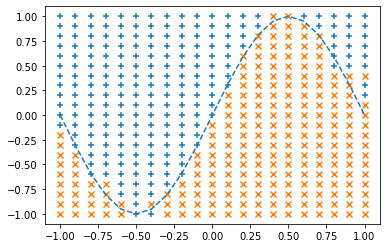

Epoch:0/10 Error:0.10243284310920969


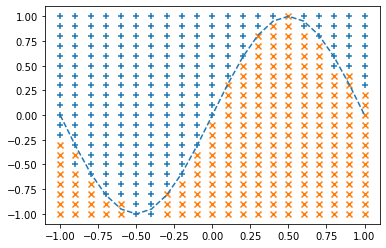

Epoch:1/10 Error:0.09984457293858076


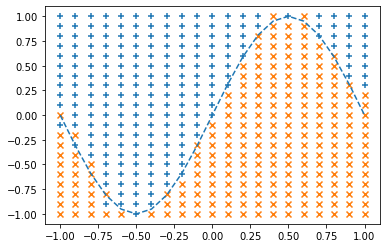

Epoch:2/10 Error:0.1032797641177121


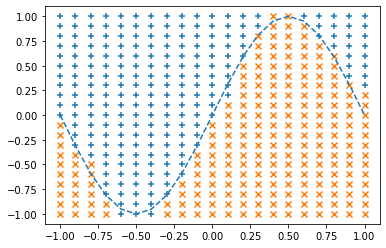

Epoch:3/10 Error:0.09330619956533259


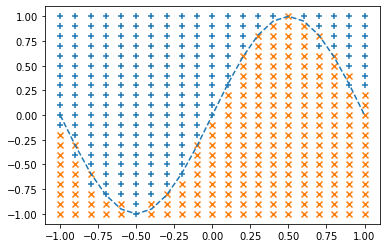

Epoch:4/10 Error:0.09735558610909487


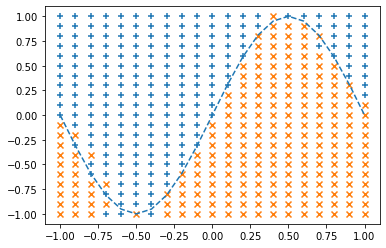

Epoch:5/10 Error:0.09487162682481357


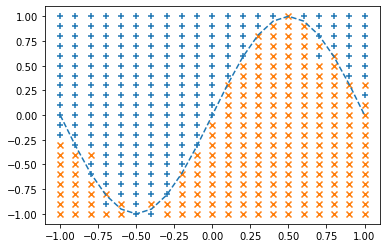

Epoch:6/10 Error:0.08731590183867738


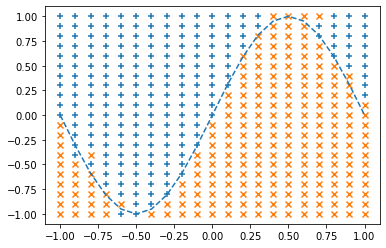

Epoch:7/10 Error:0.09294712058422301


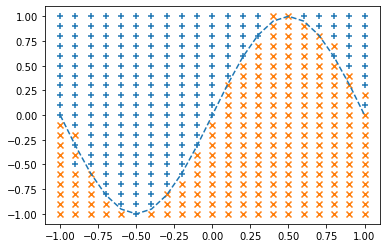

Epoch:8/10 Error:0.0756274635954981


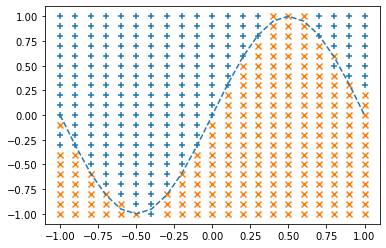

Epoch:9/10 Error:0.09160439746959019


In [ ]:
# -- 학습 --
sin_data = np.sin(np.pi * X)
for i in range(epoch):
    
    index_random = np.arange(n_data)
    np.random.shuffle(index_random)
    
    total_error = 0
    x_1 = []
    y_1 = []
    x_2 = []
    y_2 = []
    
    for idx in index_random:
        x = input_data[idx]
        t = correct_data[idx]
        
        # 순전파
        middle_layer.forward(x.reshape(1, 2))
        output_layer.forward(middle_layer.y)
        
        # 역전파
        output_layer.backward(t.reshape(1, 2))
        middle_layer.backward(output_layer.grad_x)
        
        # 가중치와 편향 수정
        middle_layer.update(eta)
        output_layer.update(eta)
        
        if i%interval == 0:
            y = output_layer.y.reshape(-1)
            
            total_error += -np.sum(t * np.log(y + 1e-7))
            if y[0] > y[1]:
                x_1.append(x[0])
                y_1.append(x[1])
            else:
                x_2.append(x[0])
                y_2.append(x[1])
                
    if i%interval == 0:
        
        plt.plot(X, sin_data, linestyle = "dashed")
        plt.scatter(x_1, y_1, marker = "+")
        plt.scatter(x_2, y_2, marker = 'x')
        plt.show()
        
        print("Epoch:" + str(i) + "/" + str(epoch), "Error:" + str(total_error / n_data))              